## Churn Analysis 

#### Import the dependencies

In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree,ensemble
from sklearn.preprocessing import LabelEncoder

#### Load the dataset

In [2]:
data = pd.read_csv(r'Churn.csv')

#### Data Exploration

In [4]:
print(data.shape)
data.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# print(data.info())
# print(data.describe())
# data.isnull().sum()

#### Separating the categorical and numerical columns

In [18]:
data_num = data.select_dtypes(include=['int64','float64'])
data_cat = data.select_dtypes(include=['object','bool'])
target = data_cat['churn'].copy()
data_cat.drop('churn',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Correlation of numerical columns

In [25]:
correlation_num = data_num.corr()
correlation_num[correlation_num>=0.3]

#### From the correlation, it is identified that, total night minutes and total night charges are highly correlated. And total international minutes and total international charges are highly correlated. Therefore, drop total night and international minutes 

In [24]:
data_num.drop(['total night minutes','total intl minutes'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Identifying the necessary columns and dropping it

In [56]:
data_cat.drop('phone number',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Identifying the number of churns in each state

In [66]:
import seaborn as sns


#### Encoding categorical variables

In [74]:
data_cat['international plan'] = np.where(data_cat['international plan']=='yes',1,0)
data_cat['voice mail plan'] = np.where(data_cat['voice mail plan']=='yes',1,0)

label_encoder = LabelEncoder()
data_cat['state']=label_encoder.fit_transform(data_cat['state'])

data['target']=np.where(data['churn']==True,1,0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [77]:
X = pd.concat([data_num,data_cat],axis=1)
y = data['target']

#### Split the data to train and test set

In [118]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=0)

#### Decision Tree model ( ID3 or GI )

In [148]:
def model(criteria,x,y,m=None):
    dtclass = tree.DecisionTreeClassifier(criterion=criteria,max_depth=m)
    dtclass.fit(x,y)
    return dtclass

#### Regularisation to treat overfit conditions

In [149]:
dtmodel = model('entropy',train_x,train_y)
train_accuracy = dtmodel.score(train_x,train_y)
max_dep = dtmodel.tree_.max_depth
if train_accuracy>=0.99: 
    train_score=[0]
    test_score=[0]
    for i in range(1,max_dep):
        dtclass = model('entropy',train_x,train_y,i)
        train_score.append(dtclass.score(train_x,train_y))
        test_score.append(dtclass.score(test_x,test_y))
        if test_score[i]*100<test_score[i-1]*100 and i>=5:
            print('Achieved maximum test accuracy of {} at the depth of {}'.format(test_score[i-1],i-1))
            break

Achieved maximum test accuracy of 0.9436450839328537 at the depth of 5


#### Random Forest Classifier

In [152]:
rfclass = ensemble.RandomForestClassifier(criterion='entropy')
rfclass.fit(train_x,train_y)
print("test accuracy using random forest classifier: "+str(rfclass.score(test_x,test_y)))

test accuracy using random forest classifier: 0.9484412470023981


C:\Users\1085679\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Importance of features in random forest classifier

In [164]:
for i,j in zip(train_x.columns,rfclass.feature_importances_):
    print(i,j)

account length 0.037183412063782936
area code 0.010771777854090728
number vmail messages 0.028202603955567472
total day minutes 0.14208769593970613
total day calls 0.03944736200248447
total day charge 0.132183019226905
total eve minutes 0.06566191848120899
total eve calls 0.029575653353727343
total eve charge 0.0626106796094367
total night calls 0.03374749708043623
total night charge 0.055365346920561366
total intl calls 0.05109744794277167
total intl charge 0.05162897408102093
customer service calls 0.13377983625101245
state 0.03368758074749681
international plan 0.0765975868741913
voice mail plan 0.016371607615599505


#### Parameters of the model

In [167]:
rfclass.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
###### Need to be referred for model tuning parameters

#### Gradient Boosting

In [180]:
modelada = ensemble.GradientBoostingClassifier()
modelada.fit(train_x,train_y)
modelada.score(test_x,test_y)

0.9508393285371702

In [182]:
modelada.score(train_x,train_y)

0.9739895958383353

#### XG Boost

In [188]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.9172661870503597

In [189]:
model.score(train_x,train_y)

0.9243697478991597

#### Other validations for the classifier

In [216]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(rfclass.predict(test_x),test_y))
print(confusion_matrix(test_y,rfclass.predict(test_x)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       744
           1       0.70      0.90      0.79        90

   micro avg       0.95      0.95      0.95       834
   macro avg       0.85      0.93      0.88       834
weighted avg       0.96      0.95      0.95       834

[[710   9]
 [ 34  81]]


#### AUC

In [212]:
from sklearn.metrics import roc_auc_score,roc_curve
probs = rfclass.predict_proba(test_x)
print(probs)
auc = roc_auc_score(test_y, probs[:,1])
print('AUC: '+str(auc))

[[0.8 0.2]
 [0.7 0.3]
 [1.  0. ]
 ...
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]]
AUC: 0.9232932212614138


#### AUC-ROC Curve

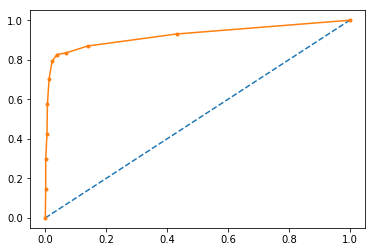

In [215]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(test_y, probs[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()